In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Sepal Length: 꽃받침의 길이
- Sepal Width: 꽃받침의 너비
- Petal Length: 꽃잎의 길이
- Petal Width: 꽃잎의 너비
- Species: 꽃의 종류 (target)

C:\Users\dm705\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


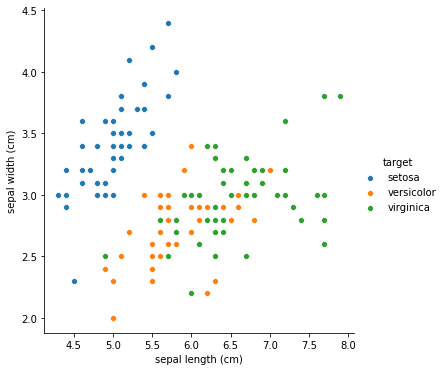

In [7]:
sns.pairplot(iris_frame,
            x_vars=["sepal length (cm)"],
            y_vars=["sepal width (cm)"],
            hue = "target", 
            size=5)

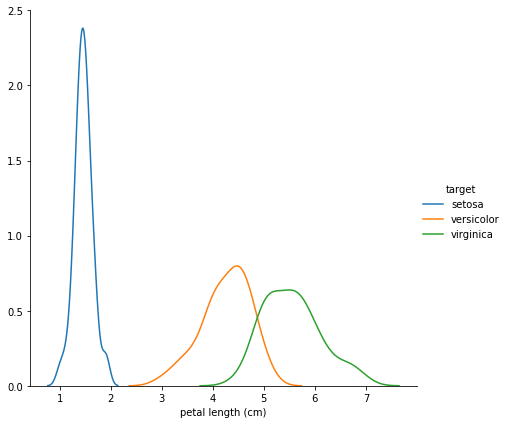

In [14]:
sns.FacetGrid(iris_frame, hue='target', height=6).map(sns.kdeplot, 'petal length (cm)').add_legend()

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

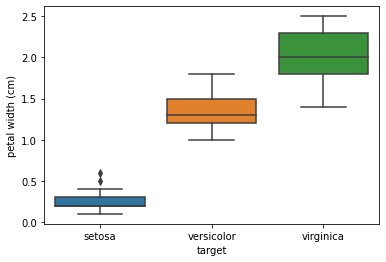

In [9]:
sns.boxplot(x="target",y="petal width (cm)",
          data=iris_frame)

In [10]:
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB 
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)", "target" ]]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
NB=GaussianNB() 
NB.fit(X,Y)
N=100

Text(0.5, 1.0, 'Gaussian Naive Bayes boundaries')

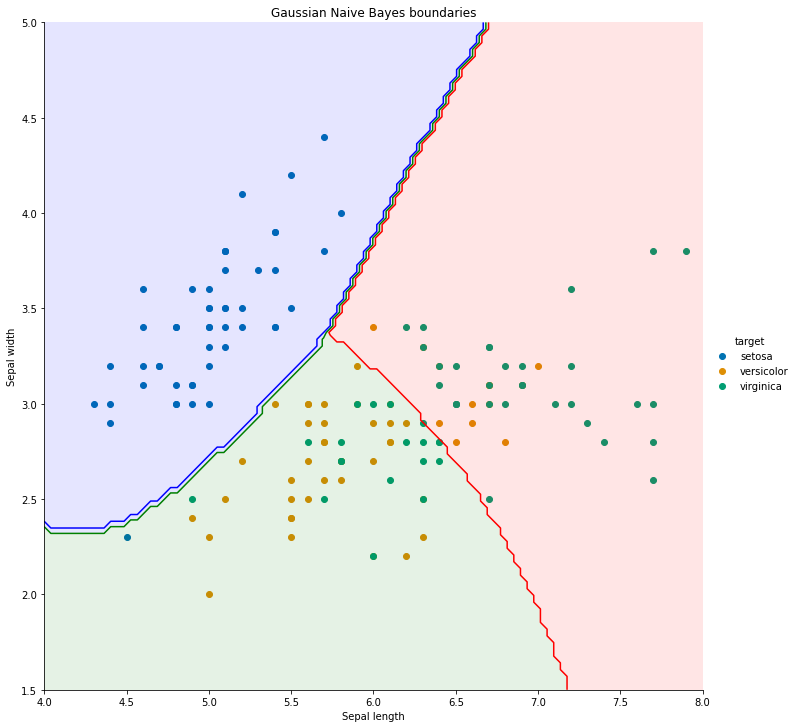

In [15]:
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sns.FacetGrid(iris_frame, hue = "target", height =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [NB.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes boundaries')